## Introduction:
 
This document contains instructions for conducting a series of data manipulation and analysis steps that represent processes encountered on a regular basis in the impact evaluation analysis.
 
## Background on exercise:
 
This exercise represents a simplified load impact evaluation of a demand response program implemented under a randomized controlled trial (RCT) experimental design. This program incentivizes some utility customers to reduce their electricity demand during peak hours on hot days (“event days”) by raising the price of electricity during those hours. The following exercise involves compiling data from separate sources into a master data set, cleaning and validating the data. As part of the validation process, summary statistics will be calculated and reported, and the data will be visualized.  Treatment and control group data must be validated to not have statistically significant differences on event-like non-event days (“proxy days”) to validate the randomization process (internal validity) of the experiment. Then, the difference in electricity use between the treatment and control groups must be calculated on the event days to estimate the load impact (demand reduction). In this simplified example, we will assume a simple differencing of the data is sufficient for impact calculations and difference in differences calculations are not needed.
 
## Original data:
- Customer hourly electricity usage (interval data)
  - 3 files (Organized by customer by day. Ex: kW1= electricity consumption in first hour of the day)
- Customer characteristics
 + 1 file (1=treatment group, 0=control group)
- Event and proxy day data
 + 1 file
 
Event period: 2 PM – 6 PM. Note: this is kW15 - kW18 and hour 15 – 18 in the data
 
For audience from a non-technical background.
 

Instructions:
 
1. Combine all original data to create a master dataset. Some cleaning may be necessary at this step. The outcome of this step will be a single master data file.
a. Append the 3 customer interval datasets together
b. Merge the combined/appended interval data file with the customer characteristics file
c. Merge the event and proxy data with the combined interval data and customer characteristics file
d. Document and explain any issues you discovered during Step 1. If you discovered any issues, describe them in the context of this analysis.
2. Data cleaning and validation
a. Perform basic data cleaning and validation checks. Check for the following:
i. Duplicates
ii. Missing values
iii. Outliers
b. Document all data issues
i. Discuss anything you noticed and explain your assumptions. What effect will the data cleaning in 2a have on the analysis, if any.
c. Calculate summary statistics and generate a table to report findings; format this table as you would in a final report
i. The following metrics should be calculated and reported for treatment and control customers
1. Customer count
2. Total number of observations
3. Mean, and standard deviation of hourly electricity usage on proxy days during the event period
4. Provide a description of the information the table is displaying
d. Conduct a statistical T-test on the mean event period hourly usage data between treatment and control group on proxy days.
i. Are the treatment and control group equivalent on the proxy days?
ii. Show the output that supports this conclusion
e. Generate two graphs, one for the average proxy day and one for the average event day, with clear labeling; format these graphs as you would in a final report
i. Graph average hourly demand of treatment and control customers (full 24 hours)
3. Calculate load impacts for the event period (15:00 to 18:00)
a. Calculate the overall average kW and percent impact for the program
b. Report findings in a table (format table as you would in a final report)
i. Include customer count, average impact per customer, aggregate impact
c. Provide a description of the information the table is displaying

Output section:
 
1d. Document any issues discovered during Step 1
 
2b. Document all data issues
​
2c. Summary statistics table
 
2d. Conclusion from T-test and supporting output
 
2e. Graphs for proxy and event days
 
3c. Results table
 
 
Please also provide any final datasets and/or code files.
 
 
 


In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
plt.close("all")

/kaggle/input/ri-test/Master data file.csv


In [2]:
#Import dataset
data = pd.read_csv('/kaggle/input/ri-test/Master data file.csv')
data.head()

,date,customer_id,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,...,kw20,kw21,kw22,kw23,kw24,obs,treatment,Customer Characteristics.customer_id,Events and Proxy Days.event_day,Events and Proxy Days.proxy_day
0,8/30/2017,4.0,0.421878,0.391057,0.697558,0.745793,0.591222,0.464849,1.379117,1.377710,...,6.980206,3.504141,1.902951,2.131377,1.154995,17.0,0.0,4.0,1.0,0.0
1,8/30/2017,13.0,0.930054,1.199772,0.124829,0.663357,0.362364,0.259349,0.505622,0.632251,...,1.071498,0.659677,0.931382,1.009175,0.717402,17.0,0.0,13.0,1.0,0.0
2,8/30/2017,26.0,1.519272,0.503459,0.486698,0.595338,0.818720,0.534207,1.312676,1.032711,...,1.875443,1.297382,1.172828,1.720406,2.803832,17.0,0.0,26.0,1.0,0.0
3,8/28/2017,4.0,0.946971,0.849843,0.952280,0.867926,0.786561,0.398582,0.434940,0.950535,...,4.319295,2.923137,1.441674,1.298640,1.300995,17.0,0.0,4.0,1.0,0.0
4,8/28/2017,13.0,0.244519,0.455644,0.492013,0.282580,0.286353,0.167478,1.126074,0.625812,...,0.280929,0.342930,0.885010,0.468562,0.875257,17.0,0.0,13.0,1.0,0.0


In [3]:
#drop all missing values
df= data.dropna() 

In [4]:
#Make sure the missing values are dropped
df.isna()

,date,customer_id,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,...,kw20,kw21,kw22,kw23,kw24,obs,treatment,Customer Characteristics.customer_id,Events and Proxy Days.event_day,Events and Proxy Days.proxy_day
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16587,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16588,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16590,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16591,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
#Identify the outliers using Zscore
col=['kw1','kw2','kw3','kw4','kw5','kw6','kw7','kw8','kw9','kw10','kw11','kw12','kw13','kw14','kw15','kw16','kw17','kw18','kw19','kw20','kw21','kw22','kw23','kw24']
from scipy import stats
outlier=df[(np.abs(stats.zscore(df[col]))>3).all(axis=1)]
df.describe()

,customer_id,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,kw9,...,kw20,kw21,kw22,kw23,kw24,obs,treatment,Customer Characteristics.customer_id,Events and Proxy Days.event_day,Events and Proxy Days.proxy_day
count,14618.000000,14618.000000,14618.000000,14618.000000,14618.000000,14618.000000,14618.000000,14618.000000,14618.000000,14618.000000,...,14618.000000,14618.000000,14618.000000,14618.000000,14618.000000,14618.0,14618.000000,14618.000000,14618.000000,14618.000000
mean,29746.220755,9.934483,8.422220,6.939138,6.046446,5.857342,5.796470,5.899377,6.804338,7.226619,...,18.401983,17.355071,16.256293,13.730851,11.549057,17.0,0.469558,29746.220755,0.624846,0.375154
std,20635.910260,100.093001,84.520210,68.394425,57.790141,56.536914,55.425740,56.013306,68.998173,72.363947,...,174.825396,167.068014,158.183848,136.066301,113.056601,0.0,0.499090,20635.910260,0.484179,0.484179
min,4.000000,0.003574,0.008806,0.004894,0.015570,0.002107,0.007711,0.006829,0.006794,0.002363,...,0.007627,0.036029,0.069986,0.018128,0.007841,17.0,0.000000,4.000000,0.000000,0.000000
25%,12271.000000,0.965175,0.842869,0.770763,0.716725,0.696743,0.701152,0.739694,0.777038,0.804008,...,1.821689,1.739610,1.651110,1.414697,1.169989,17.0,0.000000,12271.000000,0.000000,0.000000
50%,25577.000000,1.530598,1.300623,1.185277,1.096031,1.052508,1.059951,1.108561,1.161357,1.232789,...,3.262577,3.003233,2.697708,2.294369,1.878225,17.0,0.000000,25577.000000,1.000000,0.000000
75%,45096.000000,2.402363,2.045463,1.838138,1.690228,1.578227,1.557676,1.631197,1.732377,1.949887,...,4.819894,4.487708,4.090000,3.522914,2.938689,17.0,1.000000,45096.000000,1.000000,1.000000
max,74659.000000,3399.042571,2476.289898,2089.566974,2389.691761,1536.782588,1843.976019,2021.836030,2369.629506,2311.193421,...,3340.435178,3592.431870,3591.025493,3795.525945,2885.978213,17.0,1.000000,74659.000000,1.000000,1.000000


In [6]:
outlier.describe()
#The minimum outlier electricity usage is much higher companring to the 75 percentile of the raw dataset. 

,customer_id,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,kw9,...,kw20,kw21,kw22,kw23,kw24,obs,treatment,Customer Characteristics.customer_id,Events and Proxy Days.event_day,Events and Proxy Days.proxy_day
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.0,38.000000,38.000000,38.000000,38.000000
mean,35874.736842,1061.162329,871.704325,711.471654,610.721366,598.271089,605.832754,568.034825,758.520457,809.930698,...,1833.315964,1740.724781,1642.049616,1405.249667,1109.945316,17.0,0.263158,35874.736842,0.578947,0.421053
std,12055.265822,597.094915,460.884005,265.470613,355.000712,226.524085,268.714441,194.854906,431.145560,400.570972,...,723.405152,617.622503,654.208254,644.485984,482.337482,0.0,0.446258,12055.265822,0.500355,0.500355
min,9169.000000,367.336834,294.330020,250.735434,247.090213,191.177665,180.969027,213.778267,249.975117,224.637601,...,730.336842,720.511430,635.331425,665.844001,378.732438,17.0,0.000000,9169.000000,0.000000,0.000000
25%,34773.000000,738.401486,574.573003,526.174824,377.605994,404.242419,392.213528,399.814248,458.123029,516.130553,...,1172.200857,1226.851976,1057.305364,958.815051,719.294335,17.0,0.000000,34773.000000,0.000000,0.000000
50%,35465.000000,904.136400,799.948539,711.269689,596.876351,606.552305,565.734286,565.758111,650.462003,772.195290,...,1826.946866,1567.578340,1678.956282,1201.997687,1085.054387,17.0,0.000000,35465.000000,1.000000,0.000000
75%,41952.500000,1203.787442,988.644864,853.807523,747.795991,765.319827,760.026651,705.565658,893.833986,974.600572,...,2461.544709,2213.234120,2091.959422,1658.203527,1241.368307,17.0,0.750000,41952.500000,1.000000,1.000000
max,55014.000000,3399.042571,2385.335099,1415.757757,2389.691761,1007.082315,1445.721619,958.642221,2306.650465,1876.759844,...,3182.411053,2928.912699,3038.346974,3112.662328,2624.421006,17.0,1.000000,55014.000000,1.000000,1.000000


In [7]:
#Remove outliers using Z-score
df=df[(np.abs(stats.zscore(df[col])) < 3).all(axis=1)]
#Number of outliers
print(14618-14490)


128


In [8]:
#Find duplicates
#a=df.duplicated()
#df['duplicate']=a
#dup=df[df['duplicate']==True]
#dup
#duplicates are all in control group


In [9]:
#Save a dataset "cd" with all 24 hours electricity usage
df= df.drop_duplicates()
cd=df
df.to_csv('clean_data.csv', index=False)

In [10]:
# create a dataset df that only contains the event period electricity usage 
df= df.drop(['kw1','kw2','kw3','kw4','kw5','kw6','kw7','kw8','kw9','kw10','kw11','kw12','kw13','kw14','kw19','kw20','kw21','kw22','kw23','kw24'], axis=1)
#Select event period hours
col= ['kw15','kw16','kw17','kw18']
#Create variable average hourly electricty usage = (kw15 + kw16 + kw17 + kw18)/4
df['average']=df[col].mean(axis=1) 

df.to_csv('event_data.csv', index=False)

# Summary Statistics

In [11]:
TM=df[df["treatment"]>0]
CT=df[df["treatment"]<1]
#head counts = length, treatment=427, control=478, the data is balanced.
heads=[TM['customer_id'].value_counts(), CT['customer_id'].value_counts()]
print(heads)
#observations: treatment=6832, control=7658
obs=[TM.shape,CT.shape]
print(obs)

[16316.0    16
33111.0    16
71976.0    16
39458.0    16
31474.0    16
           ..
15924.0    16
70323.0    16
51840.0    16
12451.0    16
51244.0    16
Name: customer_id, Length: 427, dtype: int64, 4.0        16
62761.0    16
29459.0    16
29416.0    16
64536.0    16
           ..
9695.0     16
9433.0     16
54850.0    16
9306.0     16
33085.0    16
Name: customer_id, Length: 478, dtype: int64]
[(6832, 12), (7648, 12)]


In [12]:
#3.	Mean, and standard deviation of hourly electricity usage on proxy days during the event period
#treatment group
tm_px=TM[TM['Events and Proxy Days.proxy_day']>0]
print(tm_px['average'].mean(),tm_px['average'].std())
#control group 
ct_px=CT[CT['Events and Proxy Days.proxy_day']>0]
print(ct_px['average'].mean(),ct_px['average'].std())

3.3474543982740967 1.7634681449628575
3.2275869770637162 1.8404993377519887


In [13]:
from scipy.stats import ttest_ind
#Conduct a statistical T-test on the mean event period hourly usage data between treatment and control group on proxy days.
tm_px_hu=tm_px["average"]
ct_px_hu=ct_px["average"]
ttest_ind(tm_px_hu, ct_px_hu)

Ttest_indResult(statistic=2.4434750092085715, pvalue=0.014578213918309022)

In [14]:
#Create two datasets: proxy days & event days
px=cd[cd['Events and Proxy Days.proxy_day']>0]
ev=cd[cd['Events and Proxy Days.proxy_day']<1]

Text(0.5, 1.0, 'Average proxy day')

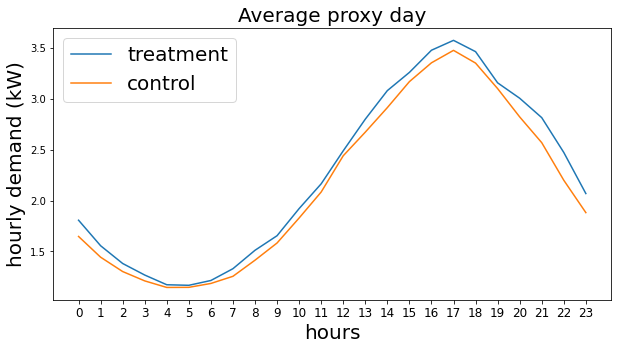

In [15]:
#select columns needed for the graphs
graph=['treatment','kw1','kw2','kw3','kw4','kw5','kw6','kw7','kw8','kw9','kw10','kw11','kw12','kw13','kw14','kw15','kw16','kw17','kw18','kw19','kw20','kw21','kw22','kw23','kw24']
px=px[graph]
ev=ev[graph]
#proxy day treatment data
px_tm = px[px['treatment']>0].describe()[1:2]
#proxy day control data
px_ct= px[px['treatment']<1].describe()[1:2]
#Append proxy day treatment data and proxy day control data
PX = px_tm.append(px_ct)
PX.index=['treatment','control']

#Proxy day graph
PX=PX.drop(columns='treatment')
PX=PX.transpose()
import matplotlib.pyplot as plt
plt.close("all")
labels=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
ax=PX.plot(figsize=(10,5))
ax.set_xticks(range(len(PX)))
ax.set_xticklabels(labels, rotation=0,fontsize=12)
plt.xlabel("hours", fontsize=20)
plt.ylabel("hourly demand (kW)", fontsize=20)
ax.legend(fontsize=20)
ax.set_title('Average proxy day', fontsize=20)



Text(0.5, 1.0, 'Average event day')

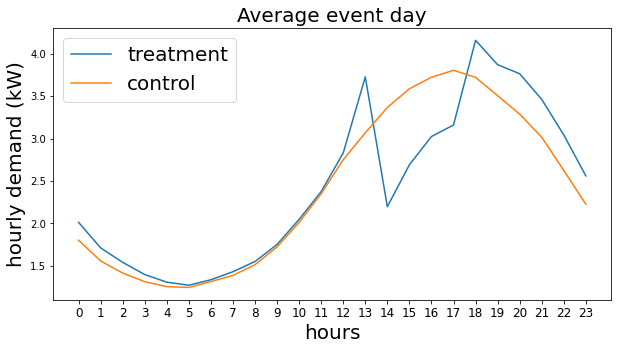

In [16]:
#Event day graph
ev_tm = ev[ev['treatment']>0].describe()[1:2]
ev_ct= ev[ev['treatment']<1].describe()[1:2]

EV = ev_tm.append(ev_ct)

EV.index=['treatment','control']

EV=EV.drop(columns='treatment')
EV=EV.transpose()

labels=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
ax=EV.plot(figsize=(10,5))
ax.set_xticks(range(len(EV)))
ax.set_xticklabels(labels, rotation=0,fontsize=12)
plt.xlabel("hours", fontsize=20)
plt.ylabel("hourly demand (kW)", fontsize=20)
ax.legend(fontsize=20)
ax.set_title('Average event day', fontsize=20)

In [17]:
#calculate the load impact
#event period on event days

ev=df[df['Events and Proxy Days.proxy_day']<1]
ev_tm = ev[ev['treatment']>0].describe()[1:2]
ev_ct= ev[ev['treatment']<1].describe()[1:2]

EV = ev_tm.append(ev_ct)

EV.index=['treatment','control']

EV=EV.drop(columns='treatment')
EV=EV.transpose()
EV['dif']= EV['treatment']- EV['control']
EV['dif%'] = EV['dif']/EV['control']
#hourly usage impact and percent impact
EV


,treatment,control,dif,dif%
customer_id,33038.444965,26723.479079,6314.965885,0.236308
kw15,2.197073,3.366300,-1.169227,-0.347333
kw16,2.690741,3.586136,-0.895395,-0.249682
kw17,3.023348,3.722878,-0.699530,-0.187900
kw18,3.159783,3.804200,-0.644417,-0.169396
obs,17.000000,17.000000,0.000000,0.000000
Customer Characteristics.customer_id,33038.444965,26723.479079,6314.965885,0.236308
Events and Proxy Days.event_day,1.000000,1.000000,0.000000,0.000000
Events and Proxy Days.proxy_day,0.000000,0.000000,0.000000,NaN
average,2.767736,3.619879,-0.852142,-0.235406


In [18]:
ev_t=ev[ev['treatment']>0]
#customer count
ev_t['customer_id'].value_counts()

16316.0    10
33111.0    10
71976.0    10
39458.0    10
31474.0    10
           ..
15924.0    10
70323.0    10
51840.0    10
12451.0    10
51244.0    10
Name: customer_id, Length: 427, dtype: int64

In [19]:
ev_c=ev[ev['treatment']<1]
ev_c['customer_id'].value_counts()

4.0        10
62761.0    10
29459.0    10
29416.0    10
64536.0    10
           ..
9695.0     10
9433.0     10
54850.0    10
9306.0     10
33085.0    10
Name: customer_id, Length: 478, dtype: int64

In [20]:
#aggregated control group usage
print(sum(ev_c[col].sum()))
#aggregated treatment group usage
print(sum(ev_t[col].sum()))
#aggregated saving kwh
print(sum(ev_c[col].sum()-ev_t[col].sum()))

# % saving comparing to control group
sum(ev_c[col].sum()-ev_t[col].sum())/sum(ev_c[col].sum())

69212.079032836
47272.93764796801
21939.141384868


0.31698428498961145

In [21]:
#average usage per customer during event period durign event days
#treatment group usage per customer
print(47272.94/427)
#control group usage per customer
print(69212.1/478)
#impact per customer
print(144.79-110.71)
#percentage impact per customer
print(34.2/144.91)

110.70946135831382
144.79518828451884
34.08
0.2360085570354013
